In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1-J1yjZr0ThGOOptsGVKcpd-M-sFOmCAb -O noisy_fingerprint.tif
!wget --no-check-certificate https://drive.google.com/uc?id=1Zy0rxrKU6_QN18QeDIXhiYWjGB1L99FM -O noisy_septagon.tif
!wget --no-check-certificate https://drive.google.com/uc?id=1w6VmhEEeOSwpjuvOB-s-_HetJtfc_MZH -O pocker-cards.png
!wget --no-check-certificate https://drive.google.com/uc?id=1wY5p6x5HgmE6YlOWKl3nQkxSve82XQNu -O building.tif
!wget --no-check-certificate https://drive.google.com/uc?id=1xD33gESZ-8zT6xjLuUe7gkkOxkY32H1y -O flower.tif
!wget --no-check-certificate https://drive.google.com/uc?id=1_v63_-GZ-JfAqxgGVceQR69fOGyNUldb -O home.jpg
!wget --no-check-certificate https://drive.google.com/uc?id=19RKVh7e4qLVQD_Jvwh-GnCkzIkcRNM-d -O coins.png

--2024-11-27 07:01:35--  https://drive.google.com/uc?id=1-J1yjZr0ThGOOptsGVKcpd-M-sFOmCAb
Resolving drive.google.com (drive.google.com)... 74.125.142.100, 74.125.142.139, 74.125.142.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-J1yjZr0ThGOOptsGVKcpd-M-sFOmCAb [following]
--2024-11-27 07:01:35--  https://drive.usercontent.google.com/download?id=1-J1yjZr0ThGOOptsGVKcpd-M-sFOmCAb
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.199.132, 2607:f8b0:400e:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.199.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 765450 (748K) [application/octet-stream]
Saving to: ‘noisy_fingerprint.tif’

noisy_fingerprint.t 100%[===================>] 747.51K  --.-KB/s    in 0.03s   

2024-11-27 07:01:37 (27.9

In [ ]:
# importing necessary packages
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt

# 1. Iterative Thresholding

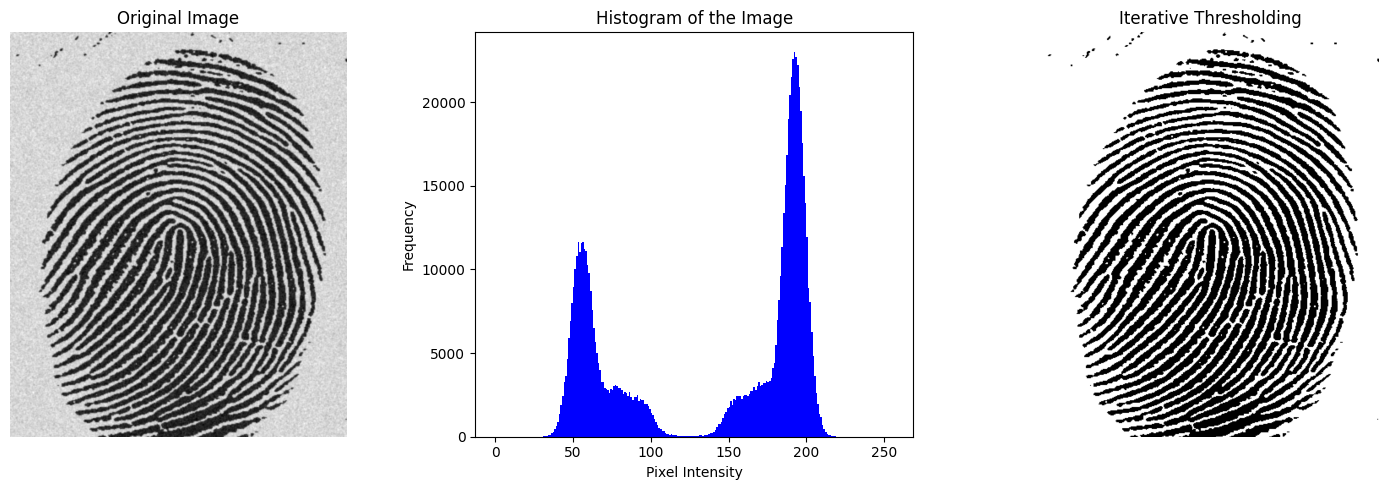

In [ ]:
# Load the image in grayscale
image = cv2.imread('noisy_fingerprint.tif', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the histogram
plt.subplot(1, 3, 2)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue')
plt.title('Histogram of the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Iterative thresholding method
mean_threshold = np.mean(image)
thresh_diff = 1  # A small value for stopping criterion
prev_threshold = 0

while abs(mean_threshold - prev_threshold) > thresh_diff:
    prev_threshold = mean_threshold
    lower_group = image[image <= mean_threshold]
    upper_group = image[image > mean_threshold]
    mean_lower = np.mean(lower_group) if lower_group.size > 0 else 0
    mean_upper = np.mean(upper_group) if upper_group.size > 0 else 255
    mean_threshold = (mean_lower + mean_upper) / 2

_, iterative_thresh = cv2.threshold(image, mean_threshold, 255, cv2.THRESH_BINARY)

plt.subplot(1, 3, 3)
plt.imshow(iterative_thresh, cmap='gray')
plt.title('Iterative Thresholding')
plt.axis('off')



plt.tight_layout()
plt.show()


# 2. Smoothing before Thresholding

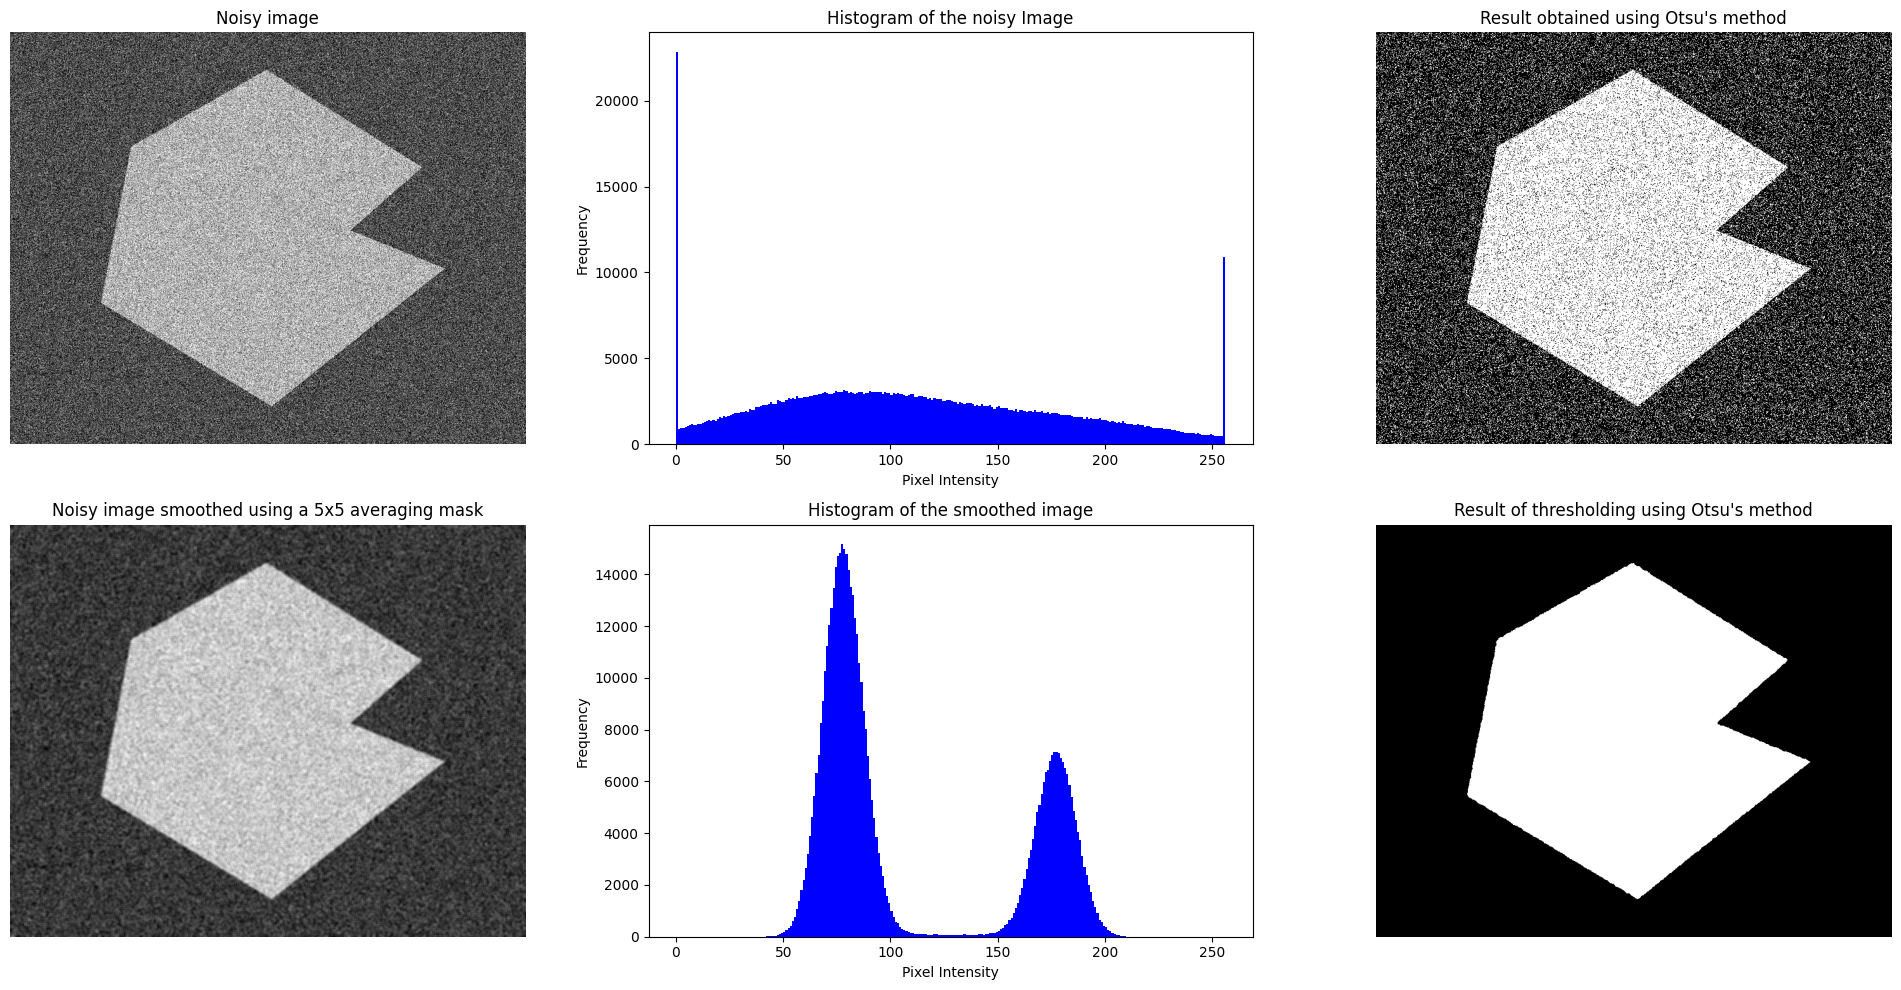

In [ ]:
# Load the image in grayscale
image = cv2.imread('noisy_septagon.tif', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Noisy image')
plt.axis('off')


# Display the histogram
plt.subplot(2, 3, 2)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue')
plt.title('Histogram of the noisy Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


# Otsu's thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.subplot(2, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Result obtained using Otsu's method")
plt.axis('off')

# Apply a 5x5 averaging filter
smoothed_image = cv2.blur(image, (5, 5))
plt.subplot(2, 3, 4)
plt.imshow(smoothed_image, cmap='gray')
plt.title("Noisy image smoothed using a 5x5 averaging mask")
plt.axis('off')

# Display the histogram
plt.subplot(2, 3, 5)
plt.hist(smoothed_image.ravel(), bins=256, range=(0, 256), color='blue')
plt.title('Histogram of the smoothed image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Otsu's thresholding
_, otsu_thresh_smoothed = cv2.threshold(smoothed_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.subplot(2, 3, 6)
plt.imshow(otsu_thresh_smoothed, cmap='gray')
plt.title("Result of thresholding using Otsu's method")
plt.axis('off')

plt.tight_layout()
plt.show()


# 3. Effetct of threshold value

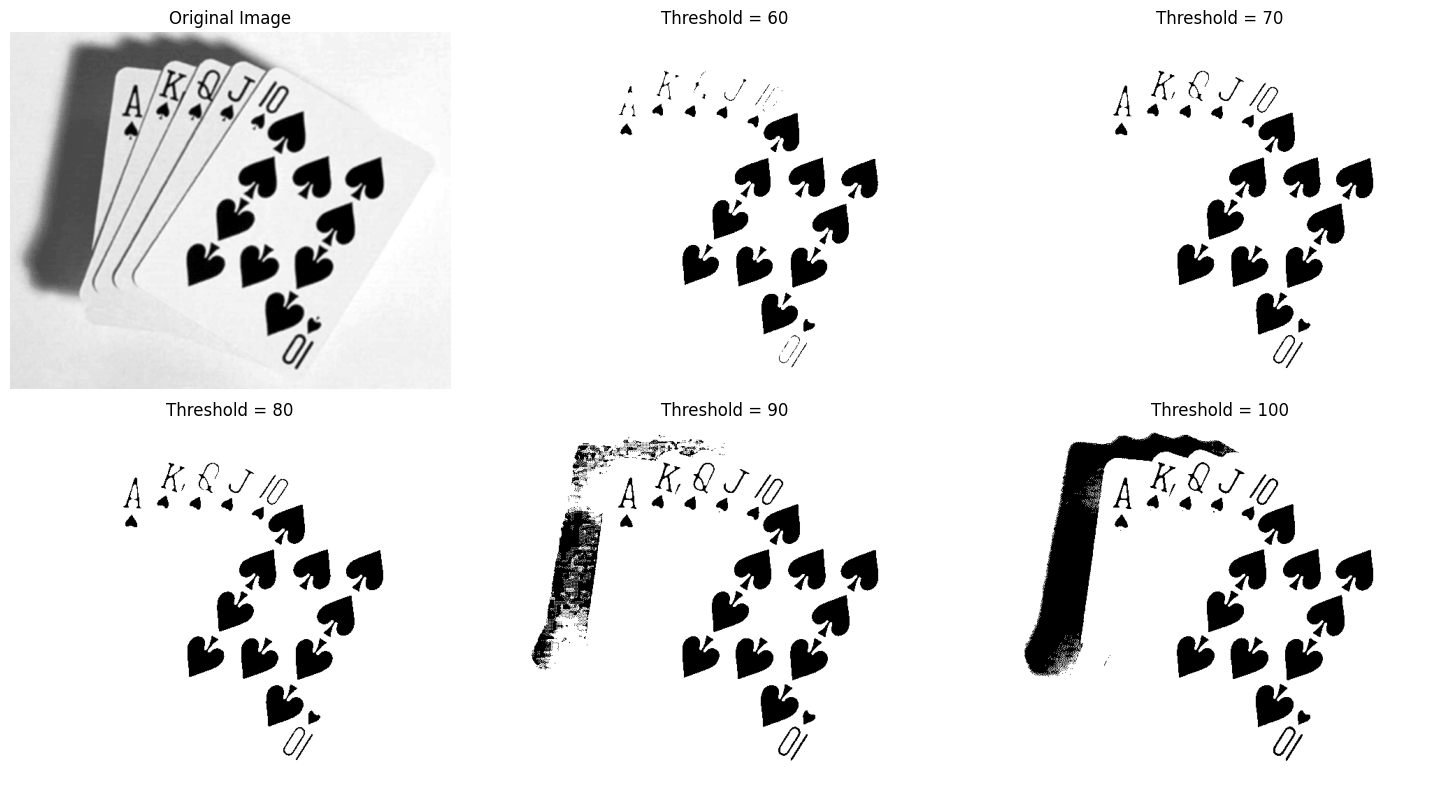

In [ ]:
# Load the image in grayscale
image = cv2.imread('pocker-cards.png', cv2.IMREAD_GRAYSCALE)

# Threshold values to test
threshold_values = [60, 70, 80, 90, 100]

# Display original image
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Apply global thresholding for each threshold value
for i, thresh in enumerate(threshold_values):
    _, thresh_image = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
    plt.subplot(2, 3, i + 2)
    plt.imshow(thresh_image, cmap='gray')
    plt.title(f'Threshold = {thresh}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# 4. Comparision of thresholding methods

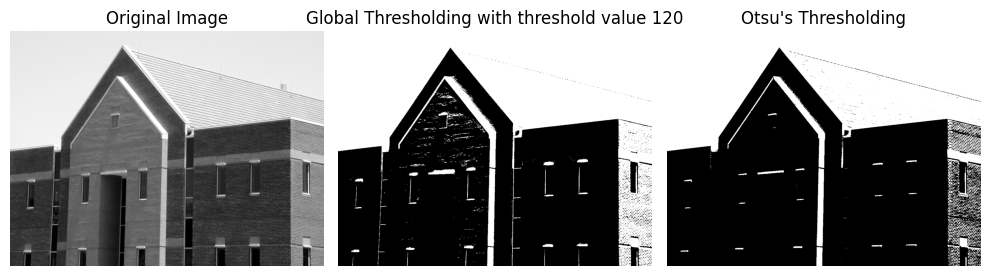

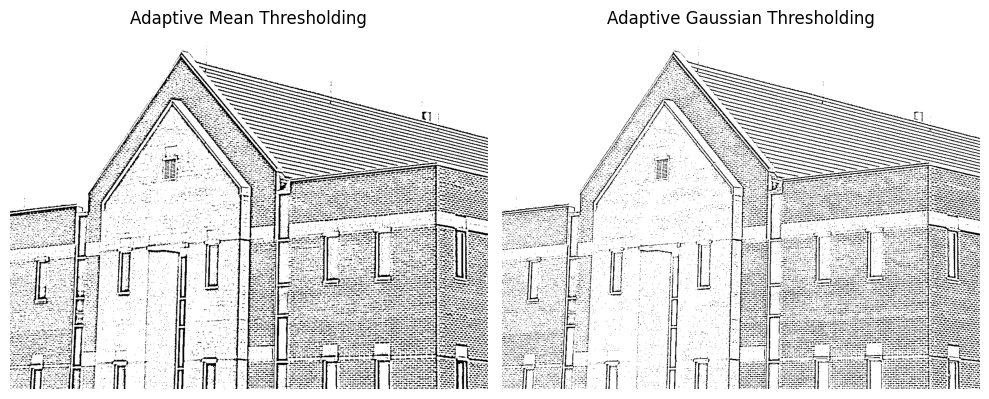

In [ ]:
# Load the image in grayscale
image = cv2.imread('building.tif', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Global thresholding with a manually chosen threshold
_, global_thresh = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
plt.subplot(1, 3, 2)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding with threshold value 120')
plt.axis('off')

# Otsu's thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.subplot(1, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()

# Adaptive thresholding with different methods
adaptive_thresh_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 10)
adaptive_thresh_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 10)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(adaptive_thresh_mean, cmap='gray')
plt.title('Adaptive Mean Thresholding')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adaptive_thresh_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()


# 5. Effect of window size in adaptive thresholding

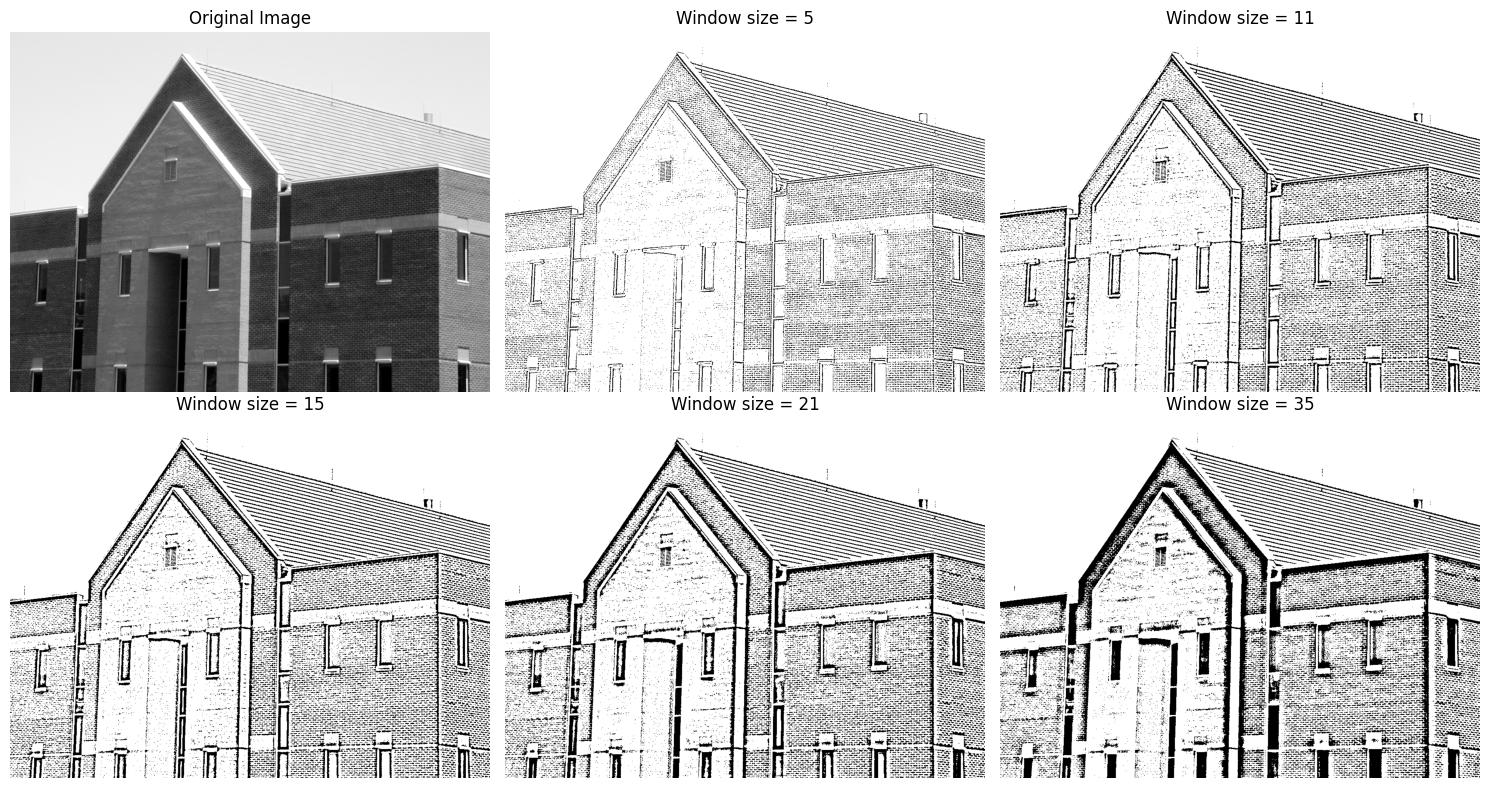

In [ ]:
# Load the grayscale image
image = cv2.imread('building.tif', cv2.IMREAD_GRAYSCALE)

# List of window sizes to compare
window_sizes = [5, 11, 15, 21, 35]


# Display original image
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Apply global thresholding for each threshold value
for i, window_size in enumerate(window_sizes):
    thresholded_image = cv2.adaptiveThreshold(image, 255,
                                              cv2.ADAPTIVE_THRESH_MEAN_C,
                                              cv2.THRESH_BINARY,
                                              window_size, 10)
    plt.subplot(2, 3, i + 2)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f'Window size = {window_size}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# 6. Clustering-based segmentation methods



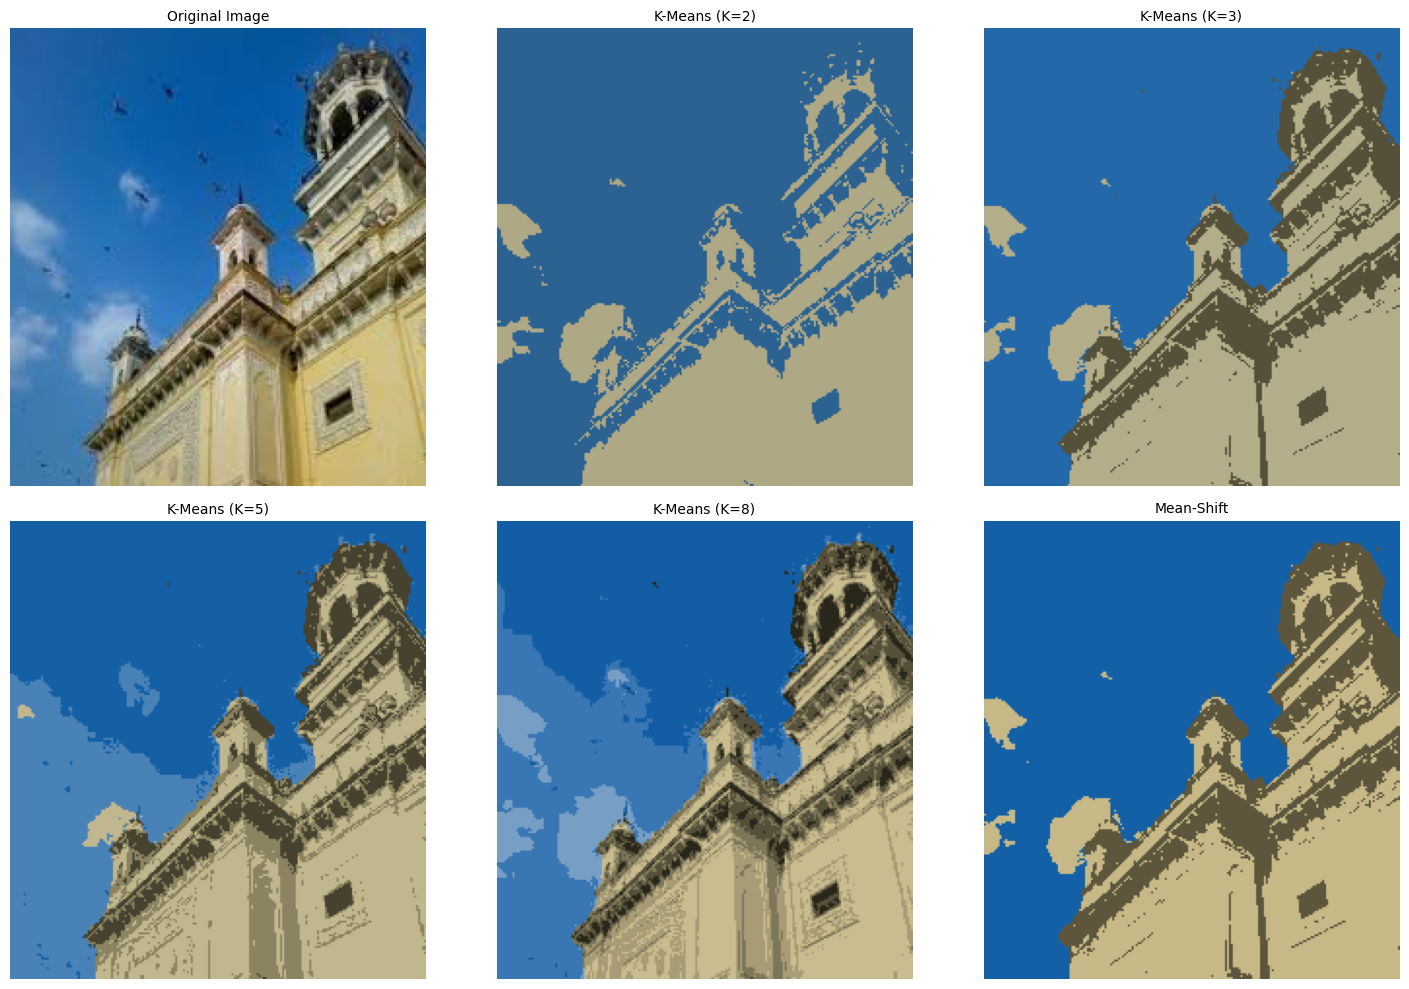

In [ ]:
# Load and preprocess the image
image = cv2.imread('home.jpg')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for visualization

def apply_kmeans(image, K=2):
  # Reshape the image for clustering
  flat_image = image.reshape((-1, 3))  # Flatten the image to (num_pixels, 3)
  flat_image = np.float32(flat_image)

  # Apply K-Means clustering
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)  # Stopping criteria
  _, labels, centers = cv2.kmeans(flat_image, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

  # Convert cluster centers to uint8 and map labels to centers
  centers = np.uint8(centers)  # Convert centers to valid image pixel range
  segmented_image = centers[labels.flatten()]  # Map each pixel to the cluster center
  segmented_image = segmented_image.reshape(image.shape)  # Reshape to original image dimensions

  return segmented_image

def apply_meanshift(image):
  # Reshape the image for clustering
  flat_image = image.reshape((-1, 3))  # Flatten the image to (num_pixels, 3)
  flat_image = np.float32(flat_image)

  # Estimate the bandwidth parameter for Mean-Shift
  bandwidth = estimate_bandwidth(flat_image, quantile=0.1, n_samples=500)

  # Apply Mean-Shift clustering
  mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
  mean_shift.fit(flat_image)

  # Get labels and cluster centers
  labels = mean_shift.labels_
  cluster_centers = np.uint8(mean_shift.cluster_centers_)

  # Map each pixel to its cluster center
  segmented_image = cluster_centers[labels.flatten()]
  segmented_image = segmented_image.reshape(image.shape)

  return segmented_image

# List of K values to compare
k_values = [2, 3, 5, 8]

# Apply K-Means for each K value and store results
segmented_images = []
for k in k_values:
    segmented_images.append(apply_kmeans(image, k))

segmented_images.append(apply_meanshift(image))

all_images = [image] + segmented_images
descriptions = ["Original Image", "K-Means (K=2)", "K-Means (K=3)", "K-Means (K=5)", "K-Means (K=8)", "Mean-Shift"]


fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(all_images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()


# 7. Region-based segmentation methods

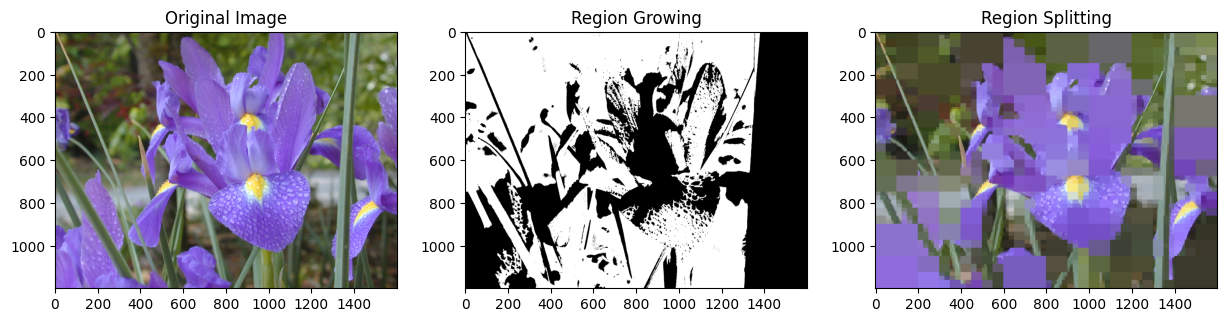

In [ ]:
def region_growing(image, seed_point, threshold=10):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create an empty mask for segmented regions
    mask = np.zeros_like(gray, dtype=np.uint8)

    # Stack to store points to process
    stack = [seed_point]
    mask[seed_point] = 255  # Mark the seed point

    while stack:
        x, y = stack.pop()
        # Check neighbors
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < gray.shape[1] and 0 <= ny < gray.shape[0]:
                # Check if the pixel is similar to the seed point and not already in the mask
                if abs(int(gray[ny, nx]) - int(gray[seed_point[1], seed_point[0]])) <= threshold and mask[ny, nx] == 0:
                    mask[ny, nx] = 255
                    stack.append((nx, ny))
    return mask

def region_splitting(image, std_threshold=10):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    output = np.zeros_like(image)

    # Recursive function for splitting
    def split(x, y, width, height):
        roi = gray[y:y+height, x:x+width]
        std = np.std(roi)

        if std < std_threshold or width <= 2 or height <= 2:  # Stop splitting
            region = image[y:y+height, x:x+width]
            output[y:y+height, x:x+width] = np.mean(region, axis=(0, 1)).astype(int)
        else:  # Split into quadrants
            hw, hh = width // 2, height // 2
            split(x, y, hw, hh)  # Top-left
            split(x + hw, y, width - hw, hh)  # Top-right
            split(x, y + hh, hw, height - hh)  # Bottom-left
            split(x + hw, y + hh, width - hw, height - hh)  # Bottom-right

    split(0, 0, w, h)
    return output

seed_point=(100, 100)
threshold=50
std_threshold=20

# Load the image
image = cv2.imread("flower.tif")
region_grown = region_growing(image, seed_point, threshold)
region_split = region_splitting(image, std_threshold)

# Display results
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1), plt.title('Original Image'), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2), plt.title('Region Growing'), plt.imshow(region_grown, cmap='gray')
plt.subplot(1, 3, 3), plt.title('Region Splitting'), plt.imshow(cv2.cvtColor(region_split, cv2.COLOR_BGR2RGB))
plt.show()


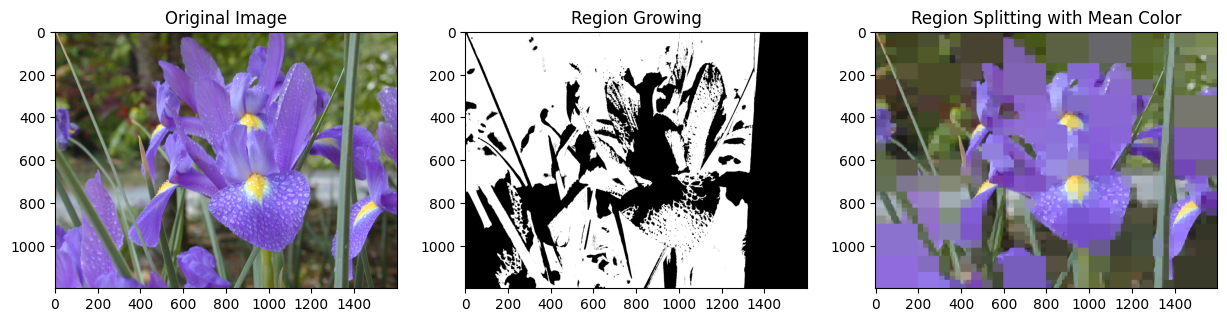

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region_growing(image, seed_point, threshold=10):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create an empty mask for segmented regions
    mask = np.zeros_like(gray, dtype=np.uint8)

    # Stack to store points to process
    stack = [seed_point]
    mask[seed_point] = 255  # Mark the seed point

    while stack:
        x, y = stack.pop()
        # Check neighbors
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < gray.shape[1] and 0 <= ny < gray.shape[0]:
                # Check if the pixel is similar to the seed point and not already in the mask
                if abs(int(gray[ny, nx]) - int(gray[seed_point[1], seed_point[0]])) <= threshold and mask[ny, nx] == 0:
                    mask[ny, nx] = 255
                    stack.append((nx, ny))
    return mask

def region_splitting(image, std_threshold=10):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    output = np.zeros_like(image)  # Change to same shape as input image for color output

    # Recursive function for splitting
    def split(x, y, width, height):
        roi = gray[y:y+height, x:x+width]
        std = np.std(roi)

        if std < std_threshold or width <= 2 or height <= 2:  # Stop splitting
            # Calculate the mean color for the region
            region = image[y:y+height, x:x+width]
            mean_color = np.mean(region, axis=(0, 1)).astype(int)
            output[y:y+height, x:x+width] = mean_color  # Assign the mean color to the region
        else:  # Split into quadrants
            hw, hh = width // 2, height // 2
            split(x, y, hw, hh)  # Top-left
            split(x + hw, y, width - hw, hh)  # Top-right
            split(x, y + hh, hw, height - hh)  # Bottom-left
            split(x + hw, y + hh, width - hw, height - hh)  # Bottom-right

    split(0, 0, w, h)
    return output

seed_point = (100, 100)
threshold = 50
std_threshold = 20

# Load the image
image = cv2.imread("flower.tif")
region_grown = region_growing(image, seed_point, threshold)
region_split = region_splitting(image, std_threshold)

# Display results
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1), plt.title('Original Image'), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2), plt.title('Region Growing'), plt.imshow(region_grown, cmap='gray')
plt.subplot(1, 3, 3), plt.title('Region Splitting with Mean Color'), plt.imshow(cv2.cvtColor(region_split, cv2.COLOR_BGR2RGB))
plt.show()


# 8. Watershed transform

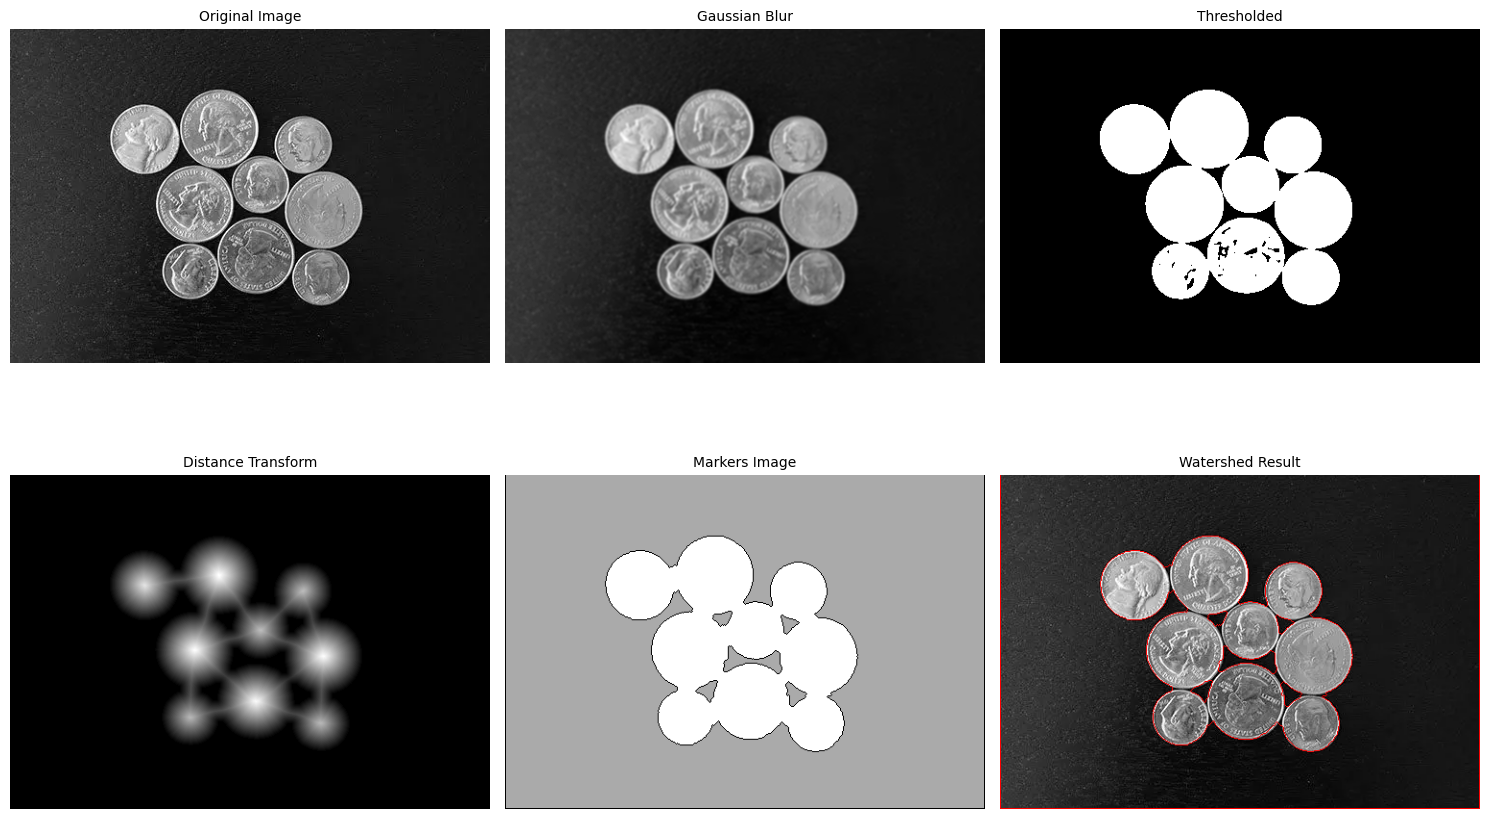

In [ ]:
# Step 1: Load the image
image = cv2.imread("coins.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply a GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 3: Threshold the image using Otsu's method
_, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 4: Remove small noise using morphological operations
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel, iterations=2)

# Step 5: Distance transform for marker generation
dist_transform = cv2.distanceTransform(cleaned, cv2.DIST_L2, 5)
_, markers = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
markers = np.uint8(markers)

# Step 6: Find sure background and foreground
sure_bg = cv2.dilate(cleaned, kernel, iterations=3)
sure_fg = cv2.erode(cleaned, kernel, iterations=3)

# Unknown region (subtract sure foreground from background)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 7: Marker labelling
num_labels, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Increment to distinguish from unknown region
markers[unknown == 255] = 0

# Step 8: Apply the watershed algorithm
markers = cv2.watershed(image, markers)

original_image = image.copy() # copying original image before modifying it
image[markers == -1] = [255, 0, 0]  # Mark watershed boundaries in red



images = [original_image, blurred, thresholded, dist_transform, markers, image]
descriptions = ["Original Image", "Gaussian Blur", "Thresholded", "Distance Transform", "Markers Image", "Watershed Result"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()


# 9. Normalized graph-cut segmentation

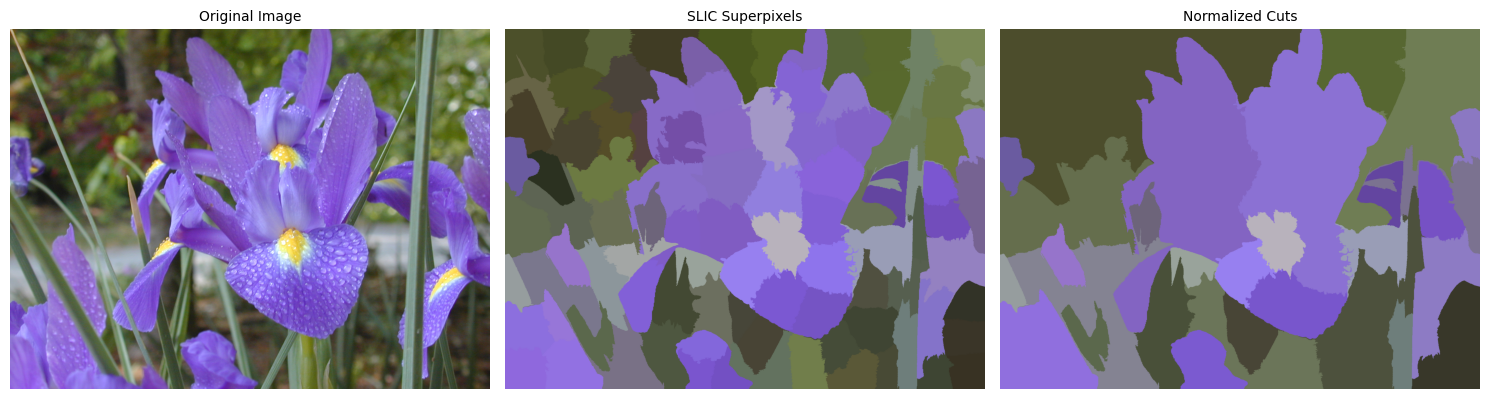

In [ ]:
from skimage import segmentation, color, graph

# Load an image from disk using OpenCV
image_path = "flower.tif"  # Replace with your image path
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Superpixel segmentation using SLIC
labels1 = segmentation.slic(img, compactness=30, n_segments=100, start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

# Region adjacency graph (RAG) and normalized cuts
g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

images = [img, out1, out2]
descriptions = ["Original Image", "SLIC Superpixels", "Normalized Cuts"]

fig, axes = plt.subplots(1, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Display the image in grayscale
    ax.set_title(descriptions[i], fontsize=10)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()